In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
sns.set()

Read data from file

In [2]:
all_tracks_df = pd.read_pickle("../data/spotify_dataset_all.pkl")

In [3]:
all_tracks_df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,classical,0.0939,0.03360,2,-24.041,0,0.0606,0.927,0.830,0.0954,0.0516,67.359,207267,3
5bu9A6uphPWg39RC3ZKeku,classical,0.4540,0.01390,4,-29.966,0,0.0514,0.995,0.943,0.0736,0.2440,130.253,184853,4
3DNRdudZ2SstnDCVKFdXxG,classical,0.1840,0.00527,1,-37.264,0,0.0432,0.995,0.887,0.1730,0.1510,170.612,315427,3
67TCAXIe154ZGDNaWceqxC,classical,0.1590,0.04010,7,-27.516,1,0.0446,0.984,0.760,0.1560,0.1060,106.239,462627,4
1Oo7XEqkrwifJn17aA0ocF,classical,0.2990,0.00626,9,-30.923,1,0.0478,0.994,0.901,0.0823,0.0634,69.043,378733,4


Normalise values

In [4]:
normalised_vals_df = all_tracks_df.loc[:, all_tracks_df.columns != 'genre']
normalised_vals_df = (normalised_vals_df - normalised_vals_df.min())/(normalised_vals_df.max() - normalised_vals_df.min())
all_tracks_df = pd.merge(all_tracks_df[['genre']], normalised_vals_df, left_index=True, right_index=True)
all_tracks_df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,classical,0.035683,0.032810,0.181818,0.441113,0.0,0.101165,0.930723,0.845214,0.084732,0.029023,0.148602,0.084694,0.50
5bu9A6uphPWg39RC3ZKeku,classical,0.426247,0.013053,0.363636,0.308423,0.0,0.076801,0.998996,0.960285,0.062150,0.229169,0.521763,0.062907,0.75
3DNRdudZ2SstnDCVKFdXxG,classical,0.133406,0.004398,0.090909,0.144985,0.0,0.055085,0.998996,0.903259,0.165113,0.132425,0.761220,0.189824,0.50
67TCAXIe154ZGDNaWceqxC,classical,0.106291,0.039328,0.636364,0.363290,1.0,0.058792,0.987952,0.773931,0.147504,0.085613,0.379284,0.332902,0.75
1Oo7XEqkrwifJn17aA0ocF,classical,0.258134,0.005391,0.818182,0.286991,1.0,0.067267,0.997992,0.917515,0.071162,0.041298,0.158594,0.251357,0.75


Change all genres except EDM to other

In [5]:
all_tracks_df.loc[all_tracks_df['genre'] != 'edm', 'genre'] = 'other'

Look at genre distribution

<AxesSubplot:ylabel='genre'>

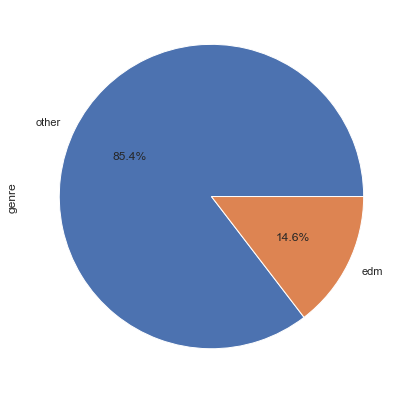

In [6]:
all_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7))

In [7]:
all_tracks_df['genre'].value_counts()

other    5643
edm       964
Name: genre, dtype: int64

Resample data

In [9]:
pop_sample_df = all_tracks_df.loc[all_tracks_df['genre'] == 'edm'].sample(n=950, random_state=1)
other_sample_df = all_tracks_df.loc[all_tracks_df['genre'] == 'other'].sample(n=950, random_state=1)
resampled_tracks_df = pd.concat([pop_sample_df, other_sample_df])
resampled_tracks_df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1K6gyNdEjiap8P5IBELG6t,edm,0.440347,0.943838,0.090909,0.909592,1.0,0.046875,0.000021,0.951120,0.139217,0.219807,0.781226,0.081819,0.75
2u4wau7fhAHSCMedjS3VDY,edm,0.757050,0.846557,0.545455,0.827358,0.0,0.052172,0.070178,0.000088,0.208618,0.697285,0.484663,0.054680,0.75
512MWs3jFUvUTdj2X4eM07,edm,0.669197,0.909740,0.727273,0.865966,0.0,0.101165,0.004535,0.015479,0.096747,0.308228,0.520090,0.034862,0.75
1SN1vSPsr4V4tIUTR3s8YW,edm,0.662690,0.578785,0.818182,0.831232,1.0,0.091367,0.470882,0.000000,0.309095,0.545407,0.425005,0.089706,0.75
5QifrqmnjHzdOuBAheeeNU,edm,0.694143,0.668042,0.636364,0.841175,1.0,0.036282,0.012145,0.000007,0.139217,0.677520,0.460782,0.090397,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2zbjlcLi1VQWqDNYdhyx1l,other,0.728850,0.395255,0.545455,0.711688,0.0,0.037606,0.280118,0.000002,0.470686,0.662956,0.319038,0.151567,0.75
1BvpeiApX8qhof8Pmi3YlH,other,0.829718,0.608872,0.363636,0.790451,1.0,0.369703,0.612449,0.000167,0.106070,0.855404,0.313105,0.061780,0.75
2uLx3Gka9TGCz9Zgu7Uwav,other,0.537961,0.694118,0.636364,0.732179,1.0,0.058528,0.533131,0.001436,0.188937,0.752419,0.505613,0.218751,0.75
25u7tVNFhpPA450EFQBwML,other,0.770065,0.729219,0.727273,0.858800,1.0,0.279661,0.184736,0.000000,0.129894,0.816915,0.526842,0.132477,0.75


<AxesSubplot:ylabel='genre'>

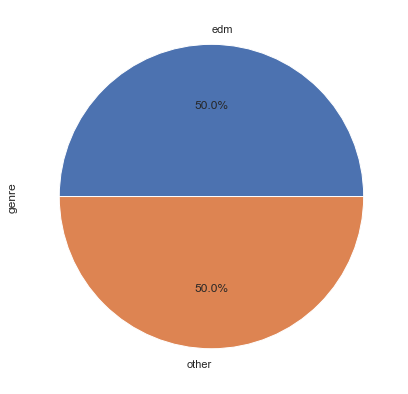

In [10]:
resampled_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7))

See summary statistics

In [11]:
resampled_tracks_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,0.596357,0.690962,0.482440,0.820748,0.565263,0.165795,0.189919,0.128510,0.177668,0.438330,0.477401,0.105648,0.740263
std,0.171129,0.224658,0.327559,0.109915,0.495853,0.203480,0.272287,0.273354,0.149629,0.246535,0.146532,0.073235,0.074606
min,0.007267,0.003605,0.000000,0.120350,0.000000,0.002648,0.000006,0.000000,0.007458,0.000000,0.125065,0.001086,0.000000
25%,0.495662,0.581793,0.181818,0.800489,0.000000,0.043101,0.013325,0.000000,0.083230,0.243732,0.372182,0.061582,0.750000
50%,0.610629,0.739248,0.545455,0.849943,1.000000,0.078390,0.060991,0.000084,0.117982,0.425257,0.486808,0.090415,0.750000
75%,0.712581,0.862854,0.727273,0.883882,1.000000,0.188096,0.234937,0.039664,0.231666,0.626547,0.537625,0.128618,0.750000
max,0.990239,1.000000,1.000000,0.983585,1.000000,1.000000,0.998996,0.997963,0.979283,1.000000,0.958147,0.936444,1.000000


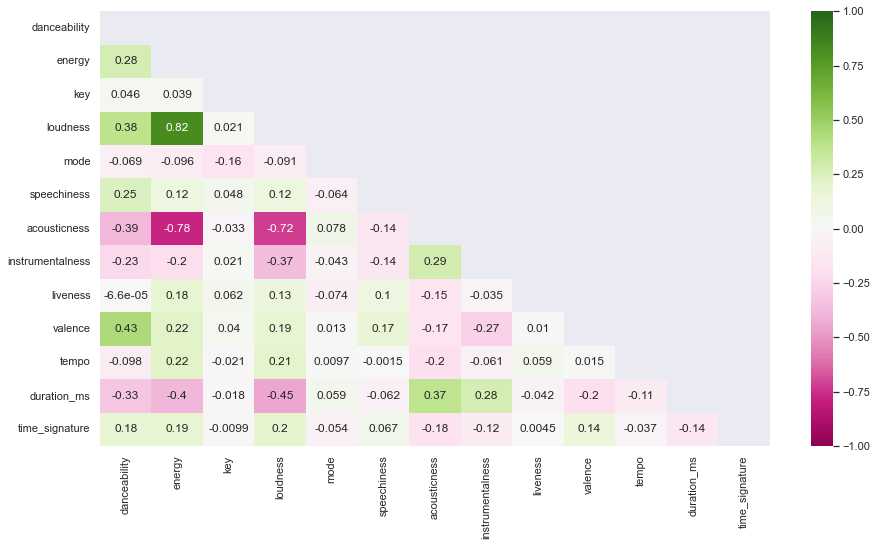

In [12]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(resampled_tracks_df.corr(), dtype=bool))
sns.heatmap(resampled_tracks_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="PiYG");

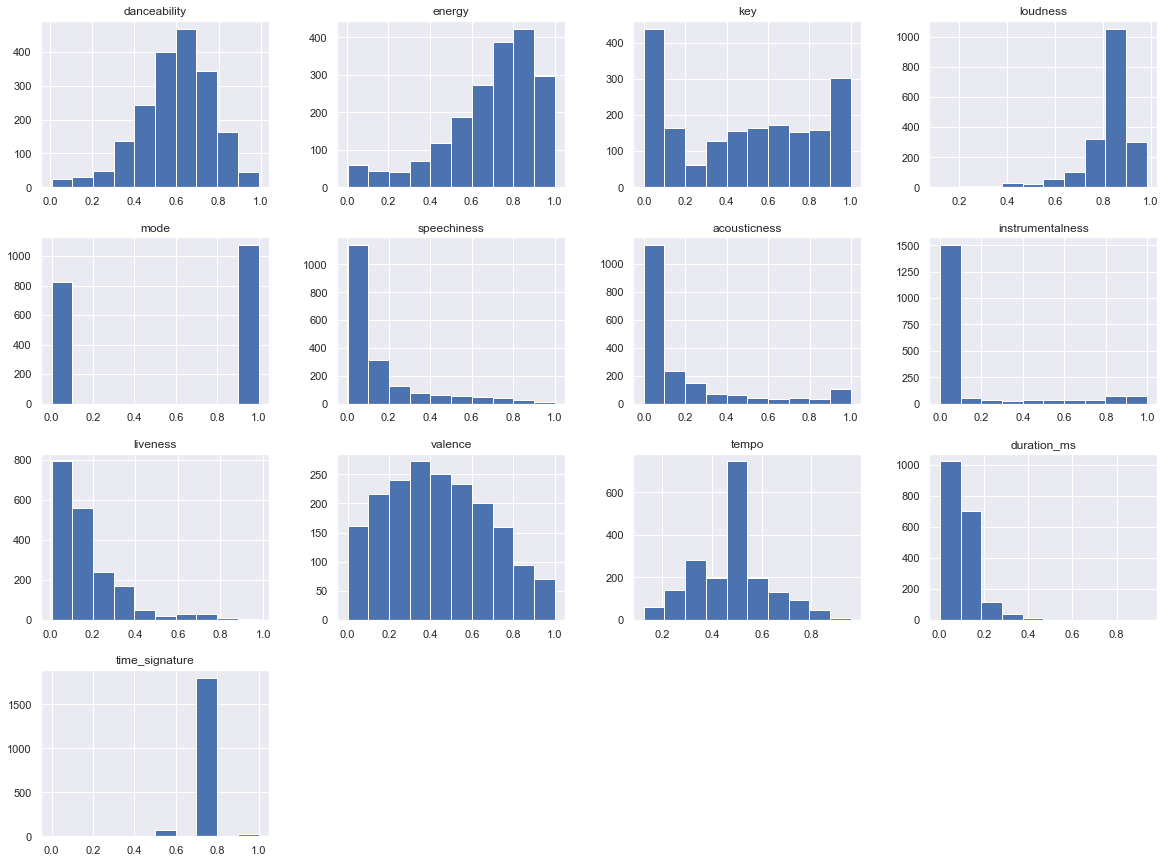

In [13]:
resampled_tracks_df.hist(figsize=(20,15));

Split data

In [14]:
# Feature variables
X = resampled_tracks_df.loc[:, resampled_tracks_df.columns != 'genre']
# Target variable
y = resampled_tracks_df['genre']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Decision Tree

In [16]:
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf = dt_clf.fit(X_train, y_train)

c:\Users\JD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


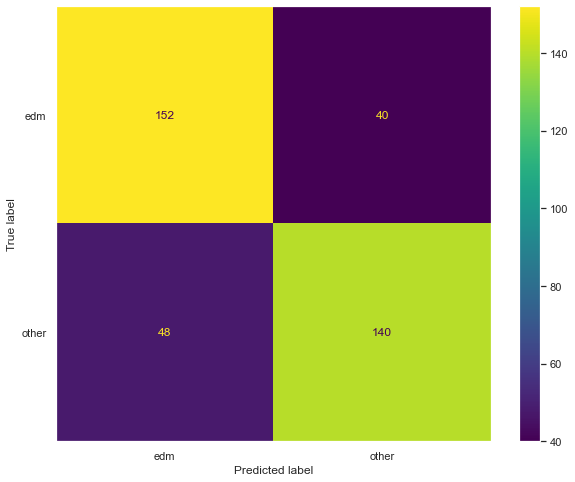

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
plt.grid(False)
metrics.plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=dt_clf.classes_, ax=ax);


Pruning decision tree

In [18]:
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]

dt_clfs = []

for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    dt_clf.fit(X_train, y_train)
    dt_clfs.append(dt_clf)

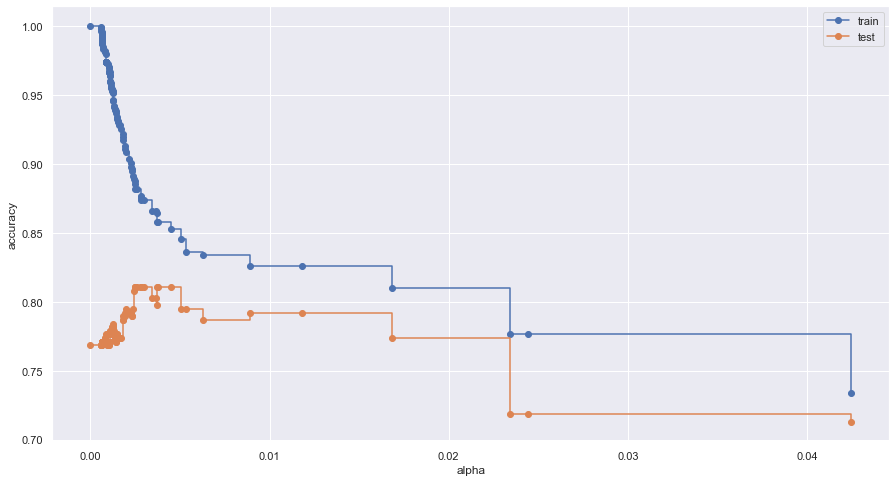

In [19]:
train_scores = [dt_clf.score(X_train, y_train) for dt_clf in dt_clfs]
test_scores = [dt_clf.score(X_test, y_test) for dt_clf in dt_clfs]

fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()

In [20]:
best_ccp = ccp_alphas[np.argmax(test_scores)]
best_ccp

0.0024750740225995514

Cross Validation

<AxesSubplot:xlabel='tree'>

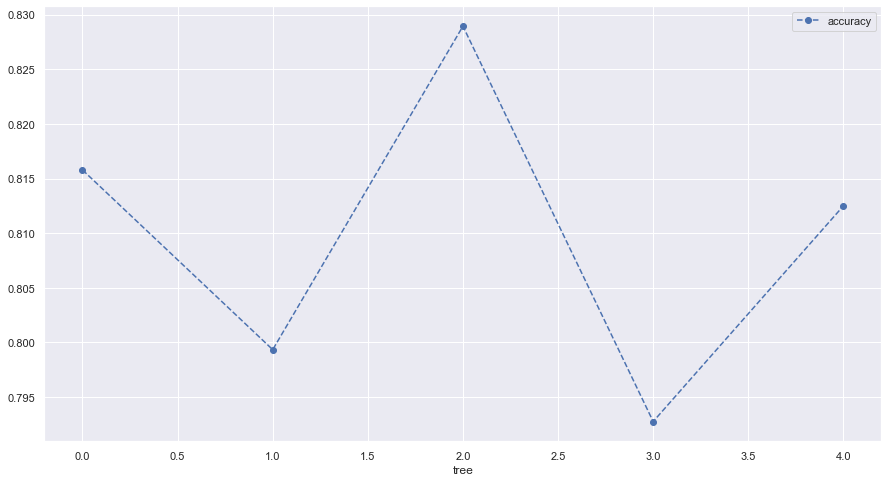

In [21]:
dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=best_ccp)
scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
fig, ax = plt.subplots(figsize=(15,8))
df.plot(x='tree', y='accuracy', marker='o', linestyle='--', ax=ax)

Above shows alpha is sensitive to different training/testing data.

<AxesSubplot:xlabel='alpha'>

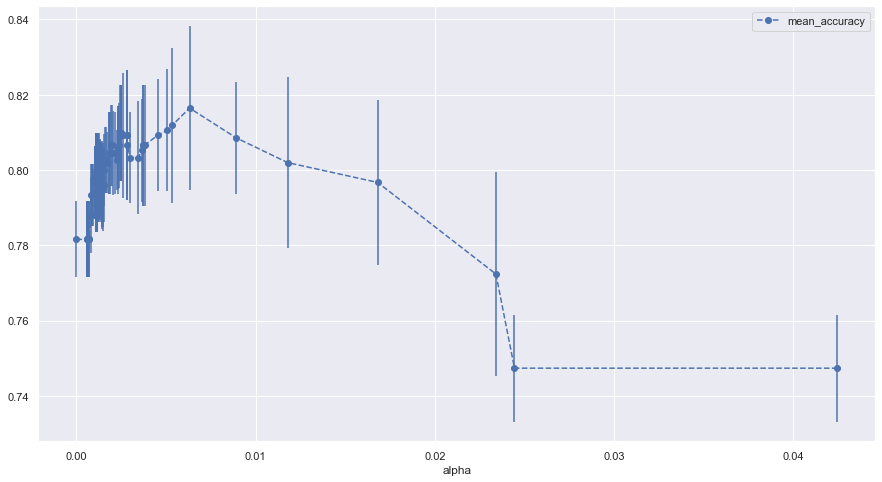

In [22]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])
fig, ax = plt.subplots(figsize=(15,8))
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--', ax=ax)

In [23]:
ideal_ccp = alpha_results.iloc[alpha_results['mean_accuracy'].idxmax()]['alpha']
ideal_ccp

0.006312921829390722

Building final tree

c:\Users\JD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


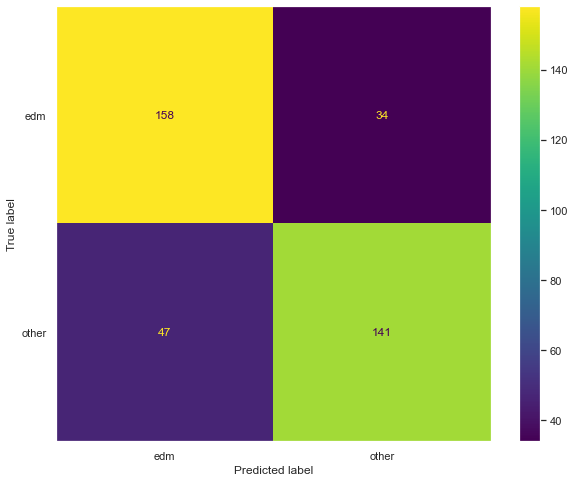

In [24]:
dt_clf_pruned = DecisionTreeClassifier(random_state=1, ccp_alpha=ideal_ccp)
dt_clf_pruned = dt_clf_pruned.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10,8))
plt.grid(False)
metrics.plot_confusion_matrix(dt_clf_pruned, X_test, y_test, display_labels=dt_clf_pruned.classes_, ax=ax);

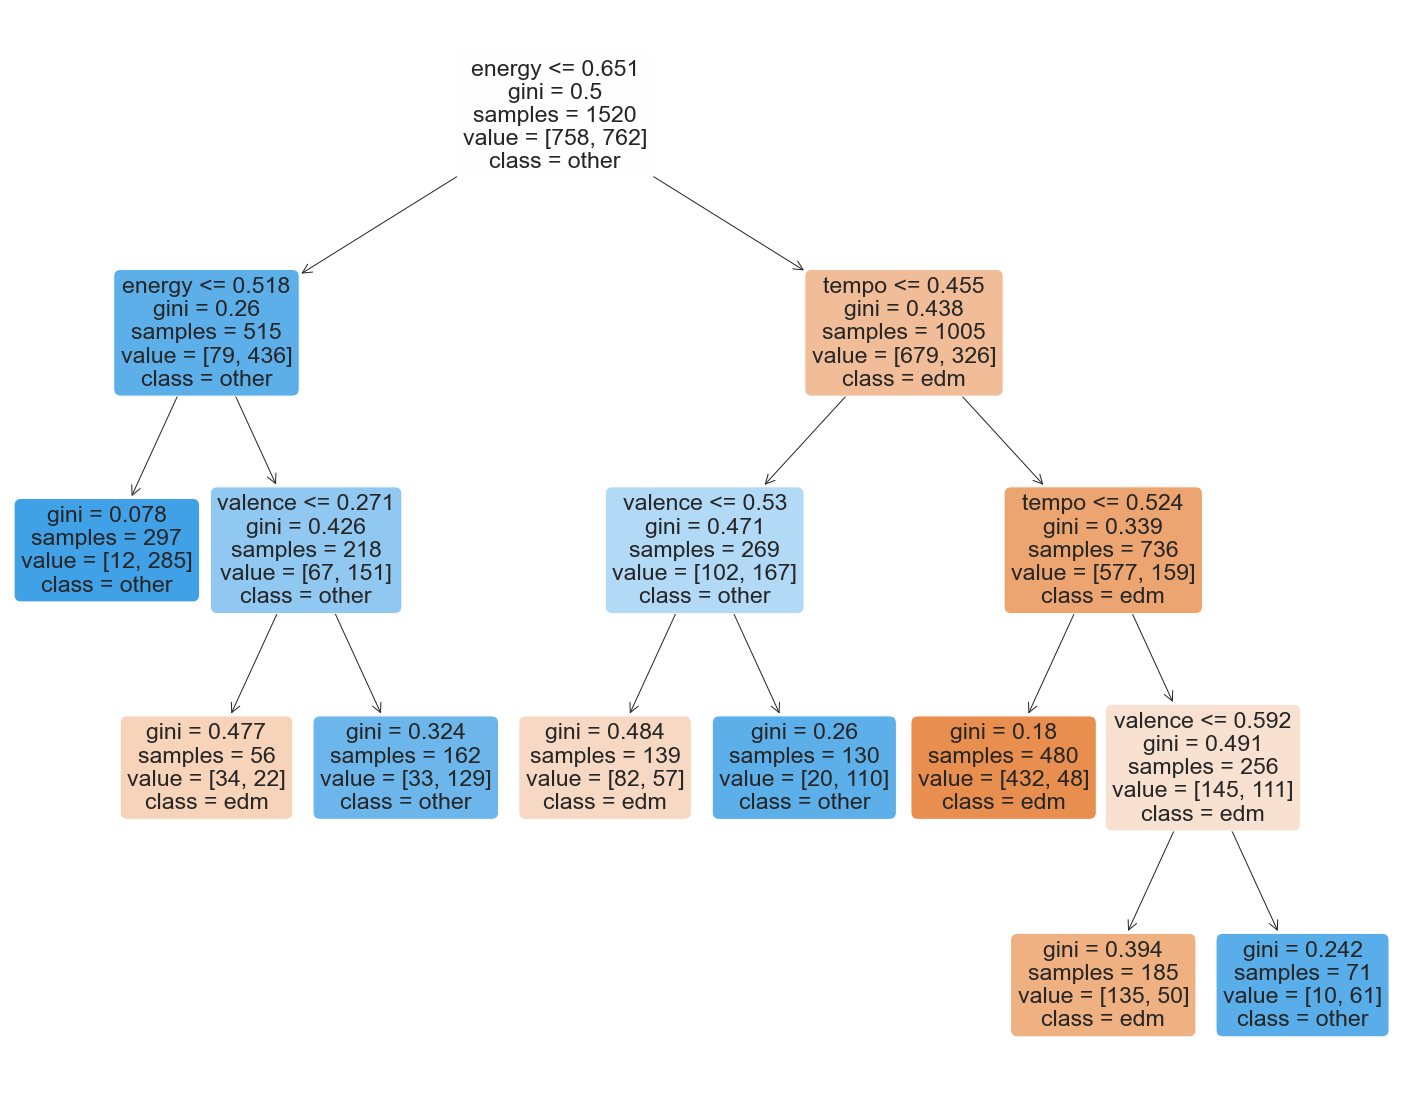

In [25]:
plt.figure(figsize=(25,20))
plot_tree(dt_clf_pruned, filled=True, rounded=True, class_names=dt_clf_pruned.classes_, feature_names=X.columns);

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [28]:
df = pd.read_pickle("../data/spotify_dataset_all.pkl")
df.loc[df['genre'] != 'edm', 'genre'] = 0
df.loc[df['genre'] == 'edm', 'genre'] = 1
df['genre'] = df['genre'].astype(int)
pdf = df.loc[df['genre'] == 1].sample(n=950, random_state=1)
odf = df.loc[df['genre'] == 0].sample(n=950, random_state=1)
df = pd.concat([pdf, odf])
df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1K6gyNdEjiap8P5IBELG6t,1,0.467,0.942,1,-3.122,1,0.0401,0.000025,0.934000,0.148,0.235,173.984,204310,4
2u4wau7fhAHSCMedjS3VDY,1,0.759,0.845,6,-6.794,0,0.0421,0.069900,0.000087,0.215,0.694,124.000,176389,4
512MWs3jFUvUTdj2X4eM07,1,0.678,0.908,8,-5.070,0,0.0606,0.004520,0.015200,0.107,0.320,129.971,156000,4
1SN1vSPsr4V4tIUTR3s8YW,1,0.672,0.578,9,-6.621,1,0.0569,0.469000,0.000000,0.312,0.548,113.945,212424,4
5QifrqmnjHzdOuBAheeeNU,1,0.701,0.667,7,-6.177,1,0.0361,0.012100,0.000007,0.148,0.675,119.975,213135,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2zbjlcLi1VQWqDNYdhyx1l,0,0.733,0.395,6,-11.959,0,0.0366,0.279000,0.000002,0.468,0.661,96.085,276067,4
1BvpeiApX8qhof8Pmi3YlH,0,0.826,0.608,4,-8.442,1,0.1620,0.610000,0.000164,0.116,0.846,95.085,183693,4
2uLx3Gka9TGCz9Zgu7Uwav,0,0.557,0.693,7,-11.044,1,0.0445,0.531000,0.001410,0.196,0.747,127.531,345187,4
25u7tVNFhpPA450EFQBwML,0,0.771,0.728,8,-5.390,1,0.1280,0.184000,0.000000,0.139,0.809,131.109,256427,4


In [29]:
X = df.loc[:, df.columns != 'genre']
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [30]:
lr = sm.Logit(y_train, X_train).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.368682
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  genre   No. Observations:                 1520
Model:                          Logit   Df Residuals:                     1507
Method:                           MLE   Df Model:                           12
Date:                Wed, 25 May 2022   Pseudo R-squ.:                  0.4681
Time:                        17:52:55   Log-Likelihood:                -560.40
converged:                       True   LL-Null:                       -1053.6
Covariance Type:            nonrobust   LLR p-value:                1.600e-203
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability         3.4982      0.614      5.697      0.000       2.295       4.702
energy               4.9246      0.670      7.351      0.000       3.611       6.238
key                 -0.0014      0.021     -0.068      0.945      -0.042       0.039
loudness             0.2386      0.043      5.581      0.000       0.155       0.322
mode                -0.3444      0.152     -2.259      0.024      -0.643      -0.046
speechiness         -6.4589      1.062     -6.080      0.000      -8.541      -4.377
acousticness        -2.1490      0.510     -4.211      0.000      -3.149      -1.149
instrumentalness     3.9928      0.588      6.788      0.000       2.840       5.146
liveness             0.8790      0.545      1.613      0.107      -0.189       1.947
valence             -5.2592      0.427    -12.316      0.000      -6.096      -4.422
tempo                0.0122      0.003      3.881      0.000       0.006       0.018
duration_ms      -1.448e-05   1.63e-06     -8.897      0.000   -1.77e-05   -1.13e-05
time_signature       0.1133      0.210      0.540      0.589      -0.298       0.525
====================================================================================
"""